# Deep Learning w/ Python

## Home Assignment II. by Kristof Rabay - B) Fashion MNIST

---

## B) Fashion MNIST

Build a convolutional network to classify the fashion mnist dataset. Build a function which will predict the class for an image. The function will get a path of an image as a parameter, it reads the image then returns the predicted class. You can assume that the path will always contain an image, which has *28 x 28 x 4* dimensions.

The dataset is available in [keras](https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles). An example image is available at `data/fashion/test.png`.

## Solution

I'll be building 2 CNNs

1. Without augmentation
2. With augmentation

### B.1 Importing necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.regularizers import l1, l2
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from livelossplot import PlotLossesKeras

from keras.datasets import fashion_mnist
from keras.utils import to_categorical

### B.2 Loading the Fashion MNIST dataset with the necessary format

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
y_train[0]

9

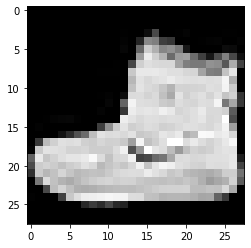

In [5]:
plt.imshow(X_train[0], cmap = 'gray')
plt.show()

Will need to add color dimension, normalize pixels (color values to be between 0 and 1) and one-hot encode the Y values

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [16]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

### B.3 Train CNN (no augmentation)

In [21]:
input_shape = (28, 28, 1)
output_classes = y_train.shape[1]

In [22]:
model = Sequential()

model.add(Conv2D(64, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256, activation = 'sigmoid'))

model.add(Dense(output_classes, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])

In [38]:
callbacks = [PlotLossesKeras(),
             EarlyStopping(monitor = 'val_loss', patience = 10),
             ReduceLROnPlateau(monitor = 'val_loss', patience = 5, factor = 1/3)]

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

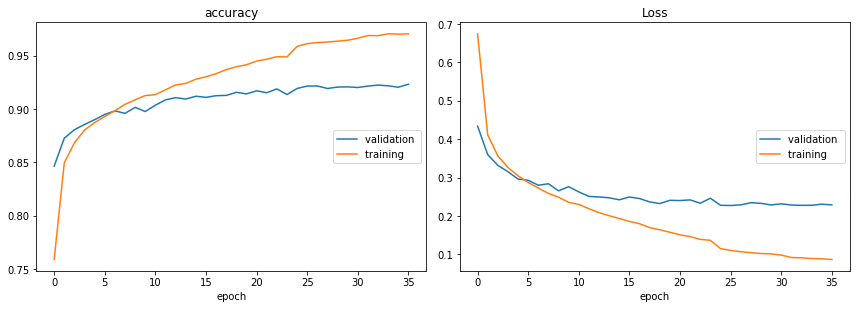

accuracy
	validation       	 (min:    0.847, max:    0.923, cur:    0.923)
	training         	 (min:    0.759, max:    0.971, cur:    0.970)
Loss
	validation       	 (min:    0.227, max:    0.434, cur:    0.229)
	training         	 (min:    0.087, max:    0.674, cur:    0.087)


In [25]:
model.fit(X_train, 
          y_train, 
          batch_size = 128, 
          epochs = 100, 
          validation_split = 0.2, 
          verbose = 1,
          callbacks = callbacks)

### B.4 Evaluate on test set

In [26]:
test_acc = model.evaluate(X_test, y_test, verbose = 0)[1]
print("Accuracy on test set: ","{:.2%}".format(test_acc))

Accuracy on test set:  91.86%


### B.5 Save model

In [27]:
model.save("fashion_mnist_model_no_aug.h5")

### B.6 Train a CNN with augmentation

Image Pre-processing

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [40]:
aug = ImageDataGenerator(rotation_range = 10,
                         width_shift_range = 0.1, 
                         height_shift_range = 0.1, 
                         shear_range = 0.1,
                         horizontal_flip = True, 
                         fill_mode = "nearest")

Training ~ 1.5 hours to run

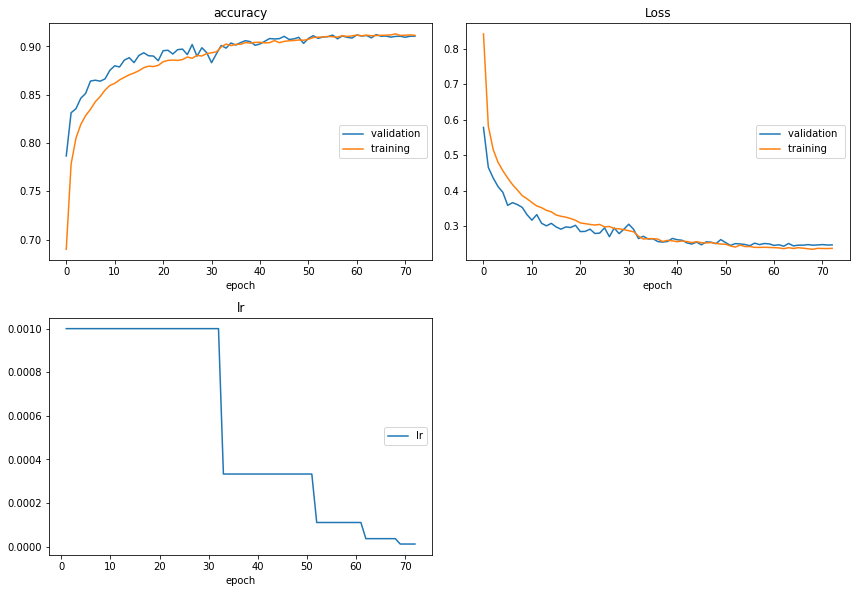

accuracy
	validation       	 (min:    0.732, max:    0.923, cur:    0.911)
	training         	 (min:    0.598, max:    0.971, cur:    0.912)
Loss
	validation       	 (min:    0.227, max:    0.704, cur:    0.247)
	training         	 (min:    0.087, max:    1.105, cur:    0.237)
lr
	lr               	 (min:    0.000, max:    0.001, cur:    0.000)


In [41]:
aug_model = Sequential()

aug_model.add(Conv2D(64, kernel_size = (3, 3), input_shape = input_shape, activation = 'relu'))
aug_model.add(MaxPooling2D())

aug_model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
aug_model.add(MaxPooling2D())
aug_model.add(Dropout(0.2))

aug_model.add(Flatten())

aug_model.add(Dense(256, activation = 'sigmoid'))

aug_model.add(Dense(output_classes, activation = 'softmax'))



aug_model.compile(loss = 'categorical_crossentropy', 
              optimizer = 'adam', 
              metrics = ['accuracy'])


BS = 128

aug_model.fit_generator(aug.flow(X_train, y_train, 
                             batch_size = BS, 
                             seed = 20202020),
                        validation_data = (X_test, y_test), 
                        steps_per_epoch = len(X_train) // BS,
                        epochs = 100,
                        callbacks = callbacks)

Evaluating

In [42]:
test_acc_aug = aug_model.evaluate(X_test, y_test, verbose = 0)[1]
print("Accuracy on test set: ","{:.2%}".format(test_acc_aug))

Accuracy on test set:  91.07%


Saving

In [43]:
aug_model.save("fashion_mnist_model_aug.h5")

**Augmentation this time did not help**

In [44]:
print("Test accuracy without augmentation: {:.2%}, with augmentation: {:.2%}".format(test_acc, test_acc_aug))

Test accuracy without augmentation: 91.86%, with augmentation: 91.07%
